# Poisonous Mushroom Data - Decision Tree Classifier

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [13]:
# 1.- Import mushrooms data set
mushrooms_df = pd.read_csv('mushrooms.csv')

In [14]:
# 2.- Transfrom categorical columns in to dummy variables
mushrooms_df = pd.get_dummies(mushrooms_df, drop_first=False)

In [15]:
# 3.- Split data into training and test sets. Use 'class_p' as the target
X = mushrooms_df.drop(columns=['class_p','class_e'])
y = mushrooms_df['class_p']
 
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# 4.- Create decision tree classifier
dtc = DecisionTreeClassifier()

# Fit decision tree classifier
dtc.fit(X_train, y_train)

# Make a prediction
y_predict = dtc.predict(X_test)

Accuracy score of decision tree: 1.0


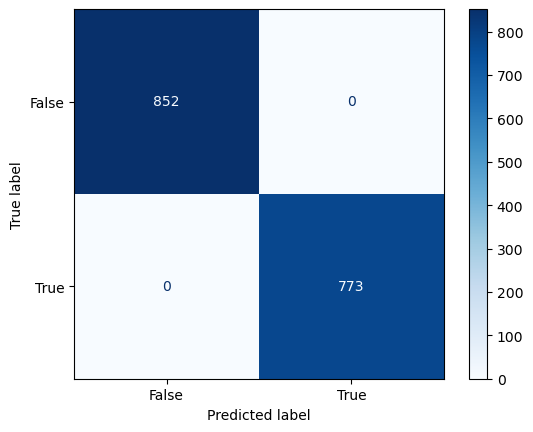

In [17]:
# 5.- Calculate the accuracy of the decision tree
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy score of decision tree: {round(accuracy, 2)}')

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Display confusion matrix
display_conf_matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                                             display_labels=dtc.classes_)
display_conf_matrix.plot(cmap='Blues')

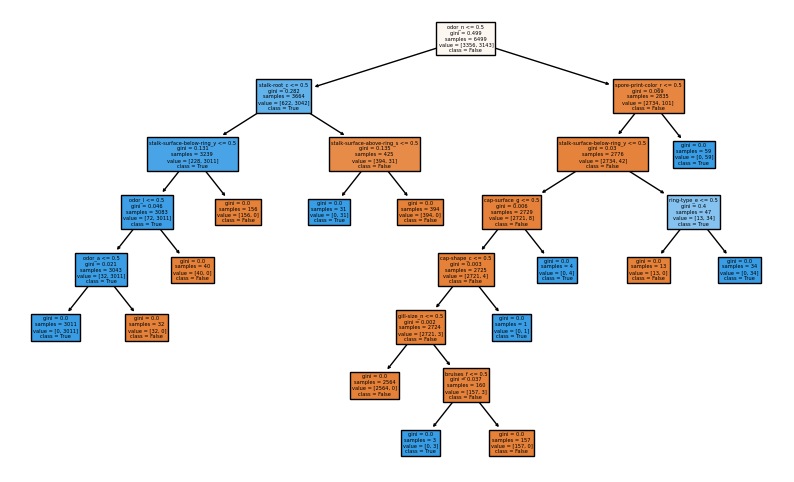

In [18]:
# 6.- Convert class names into strings
class_names = [str(cls) for cls in dtc.classes_]
               
# Create a visualization of the decision tree
plt.figure(figsize=(10,6))
plot_tree(dtc, feature_names=X.columns, class_names=class_names,
          filled=True)
plt.show()

In [19]:
# 7.- Convert categorical data by converting data to integers
features = X.astype(int)
# target = y.astype(int)

# Select 5 features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features, y)

In [20]:
# 8.- What 5 features did you choose?
selected_features = chi2_selector.get_support()
top_5_features = X.columns[selected_features]
print(f'The top 5 features are: {top_5_features}')

The top 5 features are: Index(['odor_f', 'odor_n', 'gill-color_b', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'],
      dtype='object')


In [21]:
# 9.- Split data with selected features
X_train, X_test, y_train, y_test = train_test_split(features_kbest,
                                                    y, test_size=0.2, random_state=0)
# Create decision tree classifier
dtc = DecisionTreeClassifier(max_depth=5)

# Fit decision tree classifier
dtc.fit(X_train, y_train)

# Make a prediction
y_predict = dtc.predict(X_test)

# Calculate the accuracy of the decision tree
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy score of decision tree: {round(accuracy, 2)}')

Accuracy score of decision tree: 0.94


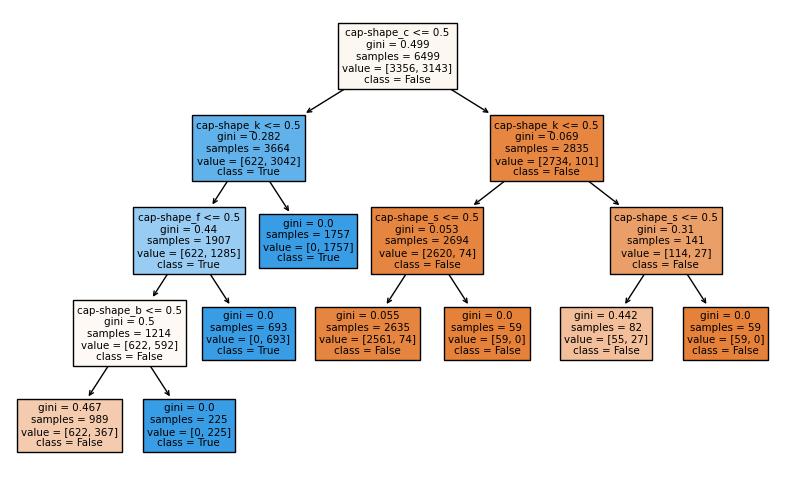

In [22]:
# Convert class names into strings
class_names = [str(cls) for cls in dtc.classes_]
               
# Create a visualization of the decision tree
plt.figure(figsize=(10,6))
plot_tree(dtc, feature_names=X.columns, class_names=class_names,
          filled=True)
plt.show()

10.- Summarize your findings. Despite being a little bit less accurate, I got a similar accuracy score after using the top 5 features. This makes the decision tree easier to understand.